In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#find null value if any
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
#features of data sets
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
#describe data sets
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Feature Engineering

In [4]:
#concept of Normalisation
dt=df.iloc[:,2:20]
dt_norm = (dt - dt.min())/(dt.max() - dt.min())
dt_norm

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.00,0.50,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.00,0.50,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.00,0.50,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.00,1.00,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.00,0.50,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094
5,0.150820,0.121212,0.56250,0.387170,0.061429,0.0,0.0,0.00,0.50,0.833333,0.394737,0.317427,0.878261,0.000000,0.262626,0.804568,0.426910,0.750473
6,0.023934,0.090909,0.28125,0.107547,0.003816,0.4,0.0,0.00,0.50,0.500000,0.156250,0.000000,0.826087,0.000000,0.010101,0.247386,0.159468,0.316469
7,0.028439,0.090909,0.18750,0.058113,0.005567,0.0,0.0,0.00,0.50,0.500000,0.084430,0.000000,0.547826,0.000000,0.994949,0.407914,0.169435,0.215281
8,0.020262,0.090909,0.12500,0.112453,0.004210,0.0,0.0,0.00,0.50,0.500000,0.083333,0.151452,0.521739,0.000000,0.732323,0.573267,0.151163,0.237653
9,0.032525,0.090909,0.31250,0.120755,0.003659,0.4,0.0,0.00,0.50,0.500000,0.175439,0.000000,0.895652,0.000000,0.186869,0.341805,0.405316,0.342626


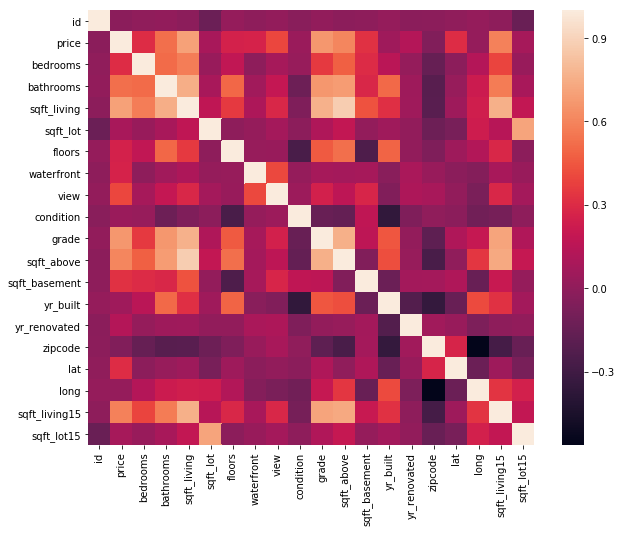

In [72]:
#plot heatmap to identify correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

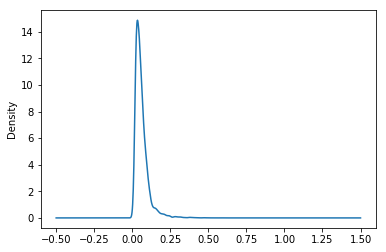

In [86]:
#plot graph to visualise more precisely price
dt_norm['price'].plot(kind = 'kde')

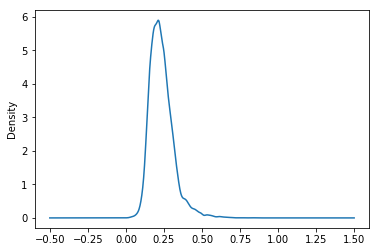

In [87]:
#plot root mean square
p = np.power(dt_norm['price'],1/2)
p.plot(kind = 'kde')

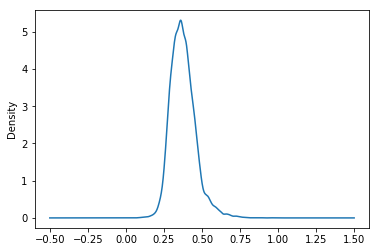

In [88]:
#plot cubic root
p = np.power(dt_norm['price'],1/3)
p.plot(kind = 'kde')

In [81]:
#preprocessing
df_p=preprocessing.scale(dt_norm)
df_p

array([[-0.86671733, -0.39873715, -1.44746357, ..., -0.35257175,
        -0.30607896, -0.9433552 ],
       [-0.00568792, -0.39873715,  0.1756067 , ...,  1.16156823,
        -0.74634143, -0.43268619],
       [-0.98084935, -1.47395936, -1.44746357, ...,  1.28353661,
        -0.13565477,  1.07013975],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, ...,  0.24788796,
        -0.60432128, -1.41025258],
       [-0.38158814, -0.39873715,  0.50022075, ..., -0.18441416,
         1.02891048, -0.8412214 ],
       [-0.58588173, -1.47395936, -1.77207762, ...,  0.24572284,
        -0.60432128, -1.41025258]])

Linear Regression

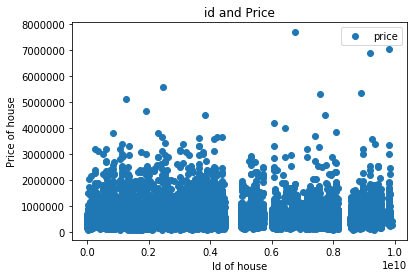

In [34]:
#plot Id Vs. Price
df.plot(x='id', y= 'price', style ='o')
plt.title('id and Price')
plt.xlabel('Id of house')
plt.ylabel('Price of house')
plt.show()

In [11]:
#define X and Y
X = df[['price','id']]
y = df['price']

In [12]:
regressor = LinearRegression()

In [13]:
#perform split on training data
x_train,x_test,y_train,y_test  = train_test_split(X,y,test_size = 0.3, random_state = 2)

In [14]:
#linear regression
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
#identify coef_
regressor.coef_

array([ 1.00000000e+00, -6.56332894e-22])

In [16]:
#intercept
regressor.intercept_

1.1641532182693481e-10

In [17]:
#prediction of X_test
r = regressor.predict(x_test)
r

array([ 735000., 1150000.,  350500., ...,  338000.,  397500.,  980000.])

In [18]:
#Data Frame of actual Vs. prediction
pdf=pd.DataFrame({"actual":[y_test],"prediction":[r]})
pdf

,actual,prediction
0,6638 735000.0 7366 1150000.0 3158 ...,"[735000.0, 1150000.0, 350500.00000000006, 8600..."


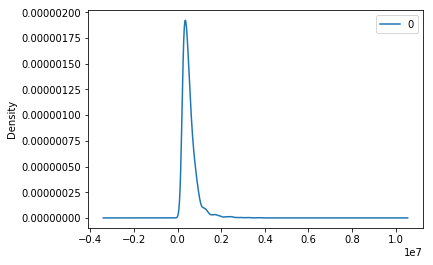

In [19]:
#Plot data of regression
r=pd.DataFrame(r)
r.plot(kind = 'kde')

In [20]:
#accuracy
regressor.score(x_test,y_test)*100

100.0